In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving indian_liver_patient.csv to indian_liver_patient.csv
User uploaded file "indian_liver_patient.csv" with length 23930 bytes


In [4]:
liver = pd.read_csv('indian_liver_patient.csv')
liver.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


<Axes: xlabel='Dataset', ylabel='count'>

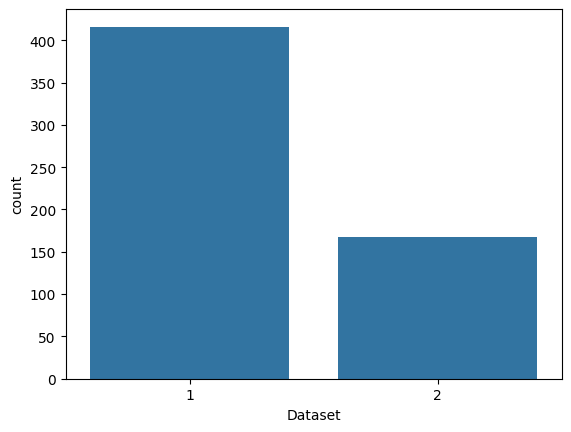

In [ ]:
sns.countplot(x='Dataset', data=liver)

In [5]:
liver.isnull().sum()

,0
Age,0
Gender,0
Total_Bilirubin,0
Direct_Bilirubin,0
Alkaline_Phosphotase,0
Alamine_Aminotransferase,0
Aspartate_Aminotransferase,0
Total_Protiens,0
Albumin,0
Albumin_and_Globulin_Ratio,4


In [6]:
liver[liver['Albumin_and_Globulin_Ratio'].isnull()]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
209,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN,1
241,51,Male,0.8,0.2,230,24,46,6.5,3.1,NaN,1
253,35,Female,0.6,0.2,180,12,15,5.2,2.7,NaN,2
312,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN,2


In [8]:
liver['Albumin_and_Globulin_Ratio'] = liver['Albumin_and_Globulin_Ratio'].fillna(liver['Albumin_and_Globulin_Ratio'].median())

In [9]:
liver.isnull().sum()

,0
Age,0
Gender,0
Total_Bilirubin,0
Direct_Bilirubin,0
Alkaline_Phosphotase,0
Alamine_Aminotransferase,0
Aspartate_Aminotransferase,0
Total_Protiens,0
Albumin,0
Albumin_and_Globulin_Ratio,0


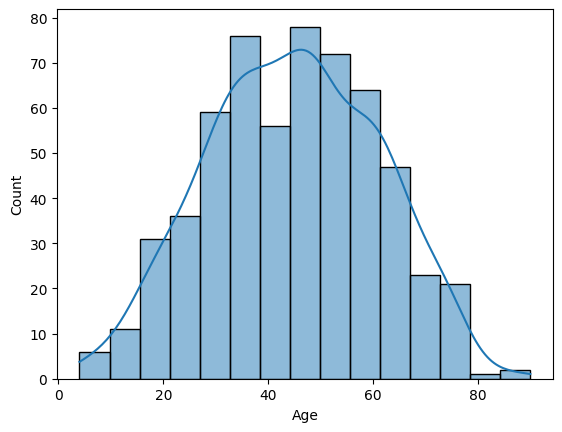

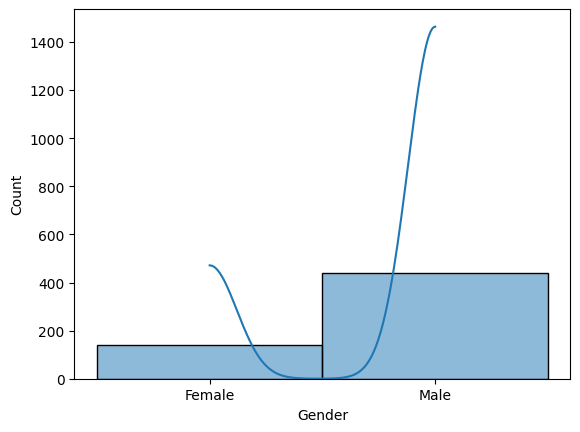

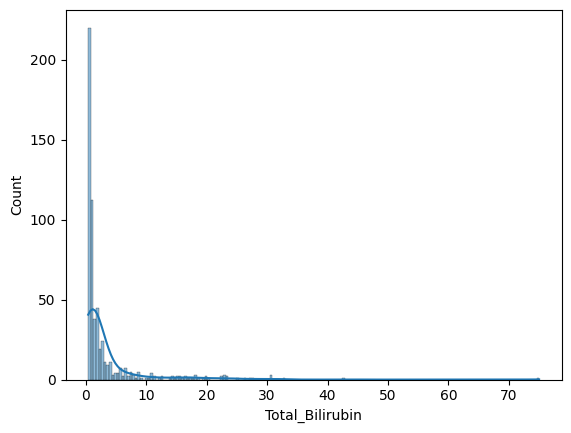

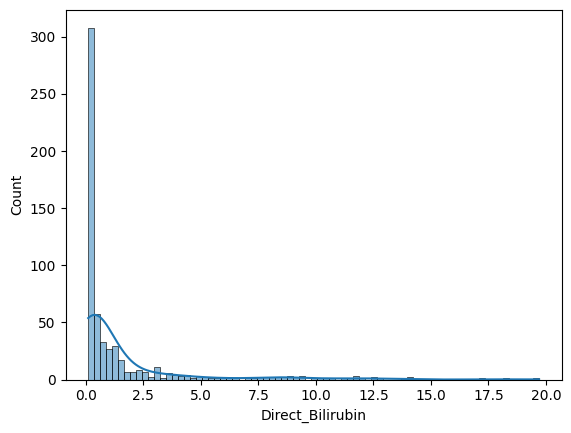

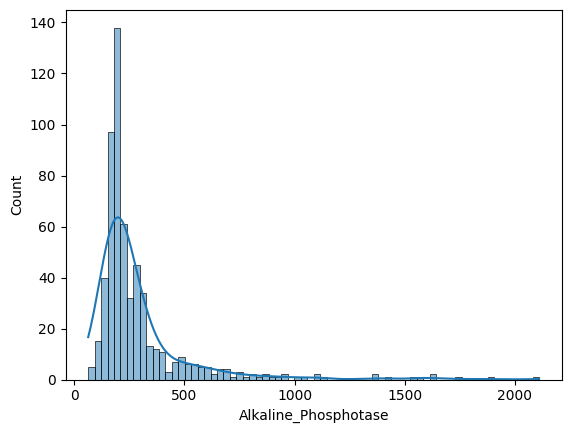

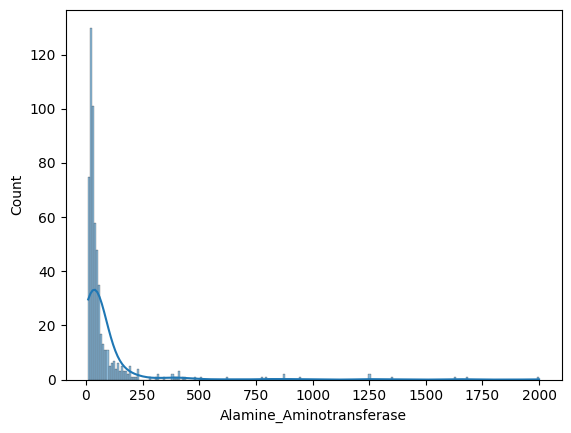

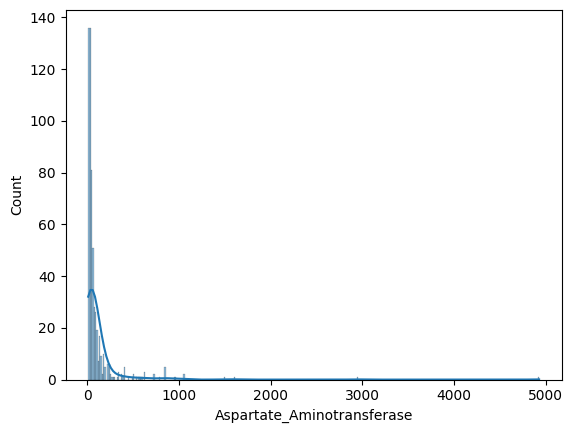

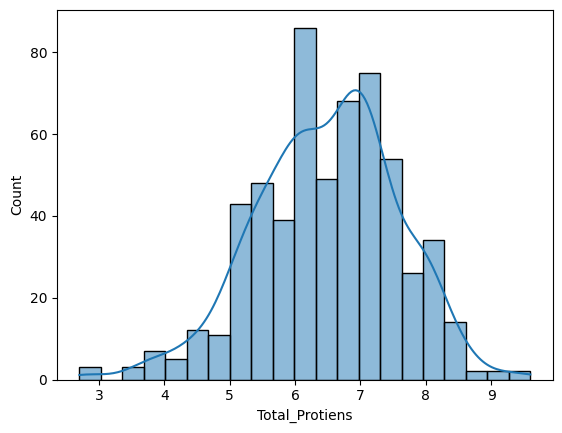

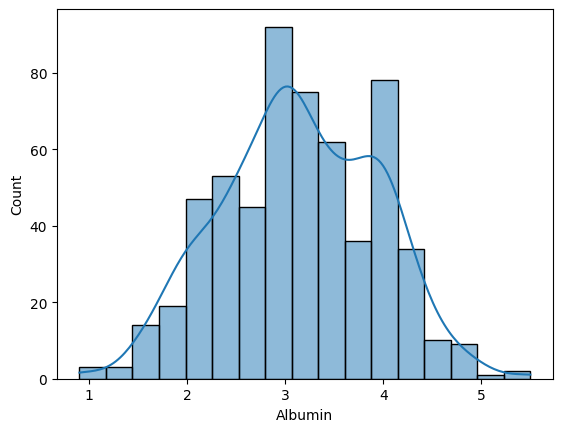

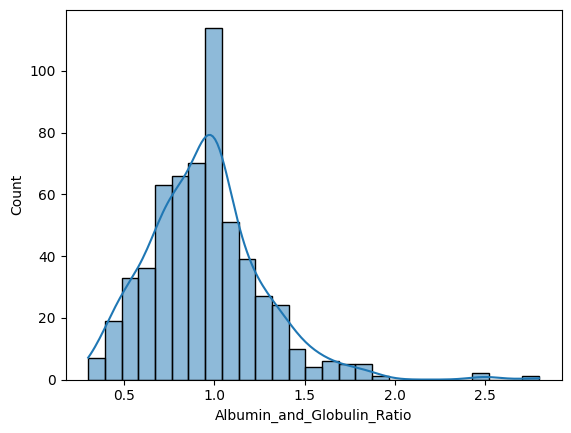

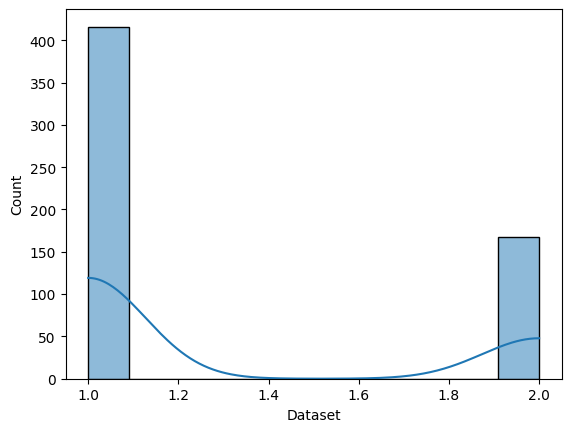

In [ ]:
for col in liver.columns:
  sns.histplot(x=col, data=liver, kde=True)
  plt.show()

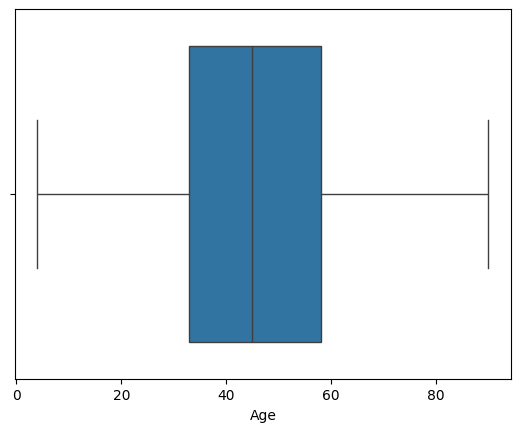

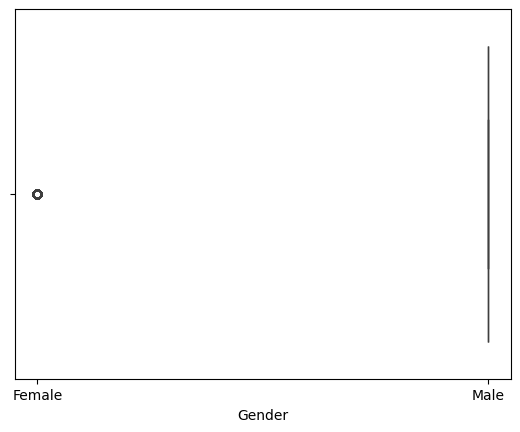

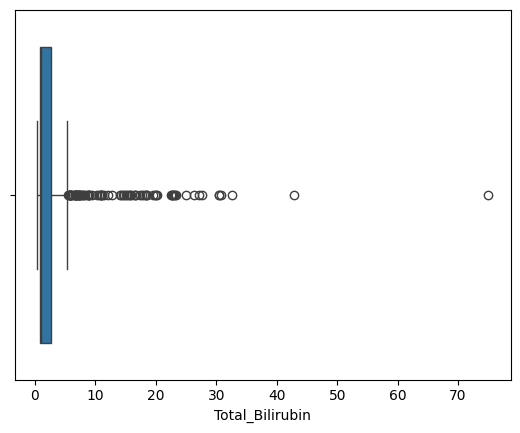

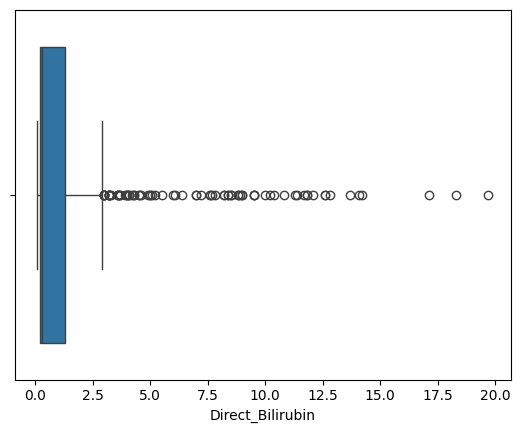

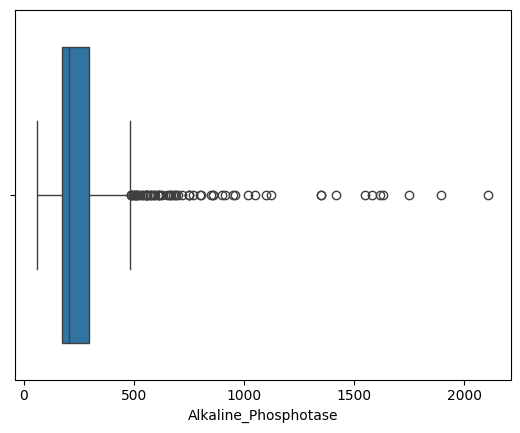

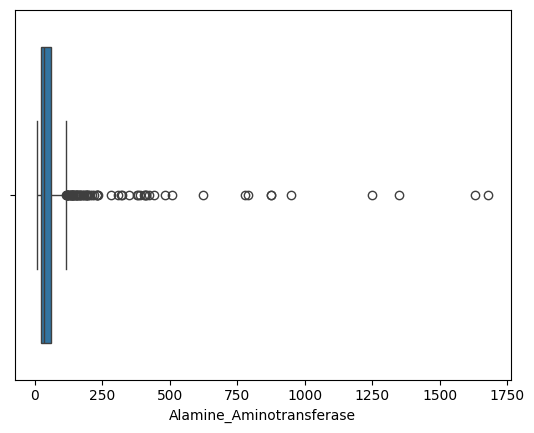

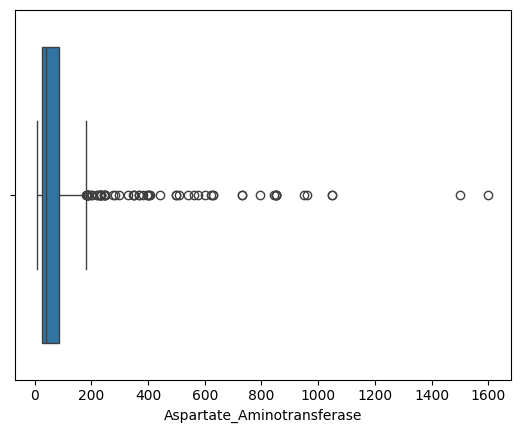

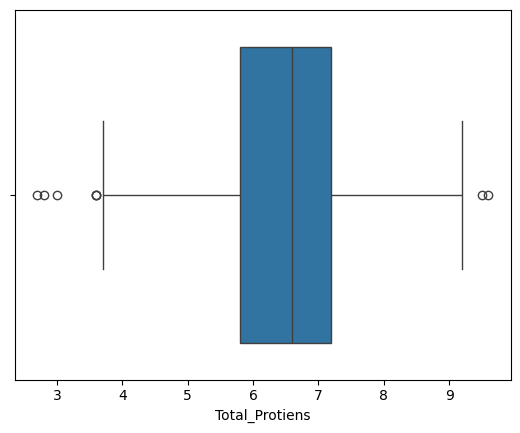

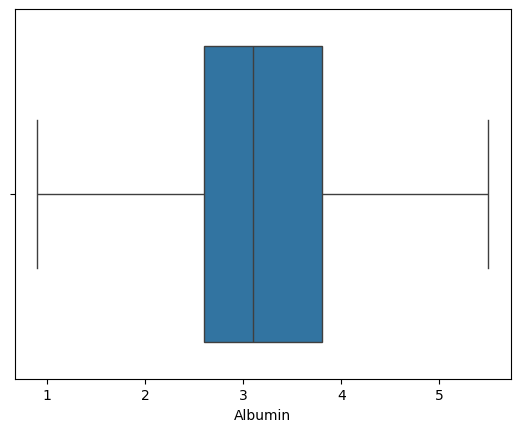

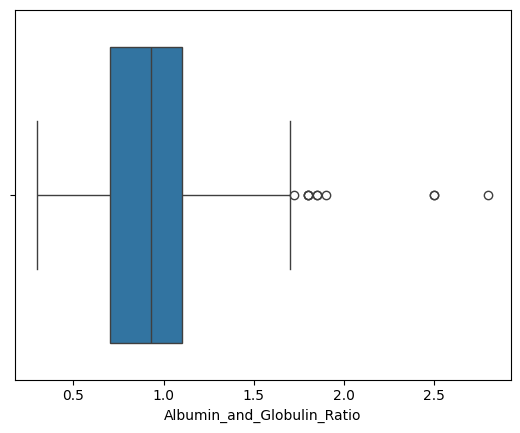

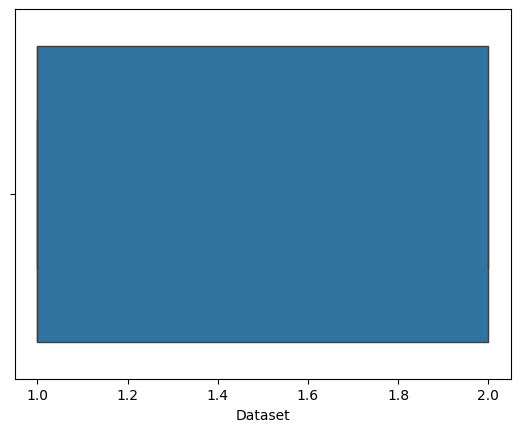

In [ ]:
for col in liver.columns:
  sns.boxplot(x=col, data=liver)
  plt.show()

In [10]:
liver = liver[liver['Aspartate_Aminotransferase']<=2500]

In [11]:
liver.shape

(581, 11)

In [12]:
liver = liver.drop_duplicates()

In [13]:
liver.shape

(568, 11)

In [14]:
liver['Gender'] = liver['Gender'].map({'Female':0,'Male':1})
liver.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [15]:

liver['Dataset'] = liver['Dataset'].map({1:1,2:0})
liver['Dataset'].value_counts()


,count
Dataset,
1,404
0,164


In [16]:
!pip install catboost
from sklearn.linear_model import RidgeClassifier,LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.9 MB/s eta 0:00:00


In [17]:
models = {
    "Logistic Regression":LogisticRegression(class_weight='balanced'),
    "Ridge Classifier": RidgeClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(class_weight='balanced'),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": LGBMClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "SVM (Linear)": SVC(kernel='linear',class_weight='balanced'),
    "SVM (RBF Kernel)": SVC(kernel='rbf',class_weight='balanced')
}

In [18]:
x = liver.drop('Dataset', axis=1)
y = liver['Dataset']

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [20]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [21]:
model_results = []
for model_name, model in models.items():
    model.fit(x_train_scaled, y_train)
    y_pred = model.predict(x_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    model_results.append((model_name, accuracy))
    print(f"{model_name} Accuracy: {accuracy}")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

Logistic Regression Accuracy: 0.6432748538011696
              precision    recall  f1-score   support

           0       0.41      0.89      0.56        44
           1       0.93      0.56      0.70       127

    accuracy                           0.64       171
   macro avg       0.67      0.72      0.63       171
weighted avg       0.80      0.64      0.66       171

[[39  5]
 [56 71]]
Ridge Classifier Accuracy: 0.7368421052631579
              precision    recall  f1-score   support

           0       0.46      0.14      0.21        44
           1       0.76      0.94      0.84       127

    accuracy                           0.74       171
   macro avg       0.61      0.54      0.53       171
weighted avg       0.68      0.74      0.68       171

[[  6  38]
 [  7 120]]
Decision Tree Accuracy: 0.6608187134502924
              precision    recall  f1-score   support

           0       0.38      0.48      0.42        44
           1       0.80      0.72      0.76       127

  

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [14:38:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


XGBoost Accuracy: 0.6842105263157895
              precision    recall  f1-score   support

           0       0.38      0.34      0.36        44
           1       0.78      0.80      0.79       127

    accuracy                           0.68       171
   macro avg       0.58      0.57      0.57       171
weighted avg       0.67      0.68      0.68       171

[[ 15  29]
 [ 25 102]]
[LightGBM] [Info] Number of positive: 277, number of negative: 120
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000255 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 397, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.697733 -> initscore=0.836526
[LightGBM] [Info] Start training from score 0.836526
[LightGBM] [Warning] No further splits with positive gain, best 

In [22]:
liver.info()

<class 'pandas.core.frame.DataFrame'>
Index: 568 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         568 non-null    int64  
 1   Gender                      568 non-null    int64  
 2   Total_Bilirubin             568 non-null    float64
 3   Direct_Bilirubin            568 non-null    float64
 4   Alkaline_Phosphotase        568 non-null    int64  
 5   Alamine_Aminotransferase    568 non-null    int64  
 6   Aspartate_Aminotransferase  568 non-null    int64  
 7   Total_Protiens              568 non-null    float64
 8   Albumin                     568 non-null    float64
 9   Albumin_and_Globulin_Ratio  568 non-null    float64
 10  Dataset                     568 non-null    int64  
dtypes: float64(5), int64(6)
memory usage: 53.2 KB


In [23]:
liver.duplicated().sum()

np.int64(0)

In [24]:
liver['Gender'].value_counts()

,count
Gender,
1,428
0,140


In [25]:
liver.shape

(568, 11)

In [26]:
print(liver['Dataset'].value_counts())

Dataset
1    404
0    164
Name: count, dtype: int64


In [ ]:
       # New Version

In [27]:
smote = SMOTE(random_state=42)
x_res, y_res = smote.fit_resample(x, y)

In [28]:
scaler  = StandardScaler()
x_res_scaled = scaler.fit_transform(x_res)

In [29]:
x_train, x_test, y_train, y_test = train_test_split(
    x_res_scaled, y_res, test_size=0.2, random_state=42, stratify=y_res
)

# CatBoost model initialization
cat_model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    l2_leaf_reg=3,
    loss_function='Logloss',
    eval_metric='Accuracy',
    random_seed=42,
    verbose=100
)
cat_model.fit(x_train, y_train, eval_set=(x_test, y_test), early_stopping_rounds=50)
y_pred = cat_model.predict(x_test)
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))

0:	learn: 0.7368421	test: 0.6419753	best: 0.6419753 (0)	total: 47.7ms	remaining: 23.8s
100:	learn: 0.9148607	test: 0.7839506	best: 0.7839506 (97)	total: 1.44s	remaining: 5.68s
200:	learn: 0.9876161	test: 0.8209877	best: 0.8271605 (153)	total: 2.43s	remaining: 3.61s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.8271604938
bestIteration = 153

Shrink model to first 154 iterations.

📊 Confusion Matrix:
 [[73  8]
 [20 61]]

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.90      0.84        81
           1       0.88      0.75      0.81        81

    accuracy                           0.83       162
   macro avg       0.83      0.83      0.83       162
weighted avg       0.83      0.83      0.83       162



In [30]:
from sklearn.model_selection import GridSearchCV
cat  = CatBoostClassifier(verbose=0,random_state=42)

param_grid = {
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'iterations': [100, 200, 300],
    'l2_leaf_reg': [1, 3, 5]
}

grid_search = GridSearchCV(
    estimator=cat,
    param_grid=param_grid,
    cv=5,                      # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(x_train, y_train)

print("✅ Best Parameters:", grid_search.best_params_)
print("✅ Best Cross-Validation Accuracy:", grid_search.best_score_)
print("✅ Test Accuracy:", grid_search.score(x_test, y_test))
print("✅ Best Model:", grid_search.best_estimator_)


✅ Best Parameters: {'depth': 6, 'iterations': 300, 'l2_leaf_reg': 1, 'learning_rate': 0.1}
✅ Best Cross-Validation Accuracy: 0.8080381633870006
✅ Test Accuracy: 0.8209876543209876
✅ Best Model: <catboost.core.CatBoostClassifier object at 0x7db861f99390>


In [31]:
best_cat = grid_search.best_estimator_
y_pred = best_cat.predict(x_test)
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))


📊 Confusion Matrix:
 [[68 13]
 [16 65]]

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.84      0.82        81
           1       0.83      0.80      0.82        81

    accuracy                           0.82       162
   macro avg       0.82      0.82      0.82       162
weighted avg       0.82      0.82      0.82       162



In [ ]:
# @title Default title text
  # XGBoost Classifier

In [32]:
xgb_model = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

xgb_model.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [15:05:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [33]:
y_pred = xgb_model.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print(f"✅ Accuracy: {acc:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion_Matrix: {cm}")

# Classification Report
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred))

✅ Accuracy: 0.8395
Confusion_Matrix: [[67 14]
 [12 69]]

📋 Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84        81
           1       0.83      0.85      0.84        81

    accuracy                           0.84       162
   macro avg       0.84      0.84      0.84       162
weighted avg       0.84      0.84      0.84       162



In [34]:
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200],
    'subsample': [0.8,1],
    'colsample_bytree': [0.8, 1]
}

grid = GridSearchCV(XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
                    param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(x_train, y_train)

print("Best Params:", grid.best_params_)
print("Best CV Accuracy:", grid.best_score_)

Best Params: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100, 'subsample': 1}
Best CV Accuracy: 0.79103160405486


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [15:07:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [35]:
best_cat = grid_search.best_estimator_
y_pred = best_cat.predict(x_test)
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))


📊 Confusion Matrix:
 [[68 13]
 [16 65]]

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.84      0.82        81
           1       0.83      0.80      0.82        81

    accuracy                           0.82       162
   macro avg       0.82      0.82      0.82       162
weighted avg       0.82      0.82      0.82       162



In [ ]:
# LightBGM

In [36]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Initialize LightGBM model
lgbm = LGBMClassifier(random_state=42)

# 2. Fit on training data
lgbm.fit(x_train, y_train)

# 3. Predict on test data
y_pred = lgbm.predict(x_test)

# 4. Evaluate
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# 5. Print results
print(f"✅ Accuracy: {acc:.4f}")
print(f"\n📊 Confusion Matrix:\n{cm}")
print(f"\n📋 Classification Report:\n{report}")

[LightGBM] [Info] Number of positive: 323, number of negative: 323
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000102 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 851
[LightGBM] [Info] Number of data points in the train set: 646, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [37]:
param_grid = {
    'num_leaves': [15, 31, 63],
    'max_depth': [-1, 5, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300]
}

lgbm = LGBMClassifier(random_state=42)

grid = GridSearchCV(estimator=lgbm,
                    param_grid=param_grid,
                    cv=5,
                    scoring='accuracy',
                    n_jobs=-1)

grid.fit(x_train, y_train)

print("✅ Best Parameters:", grid.best_params_)
print("✅ Best CV Score:", grid.best_score_)

[LightGBM] [Info] Number of positive: 323, number of negative: 323
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000132 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 851
[LightGBM] [Info] Number of data points in the train set: 646, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

In [38]:
bgm = grid.best_estimator_
y_pred = bgm.predict(x_test)
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))


📊 Confusion Matrix:
 [[67 14]
 [10 71]]

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.83      0.85        81
           1       0.84      0.88      0.86        81

    accuracy                           0.85       162
   macro avg       0.85      0.85      0.85       162
weighted avg       0.85      0.85      0.85       162



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [ ]:
#  Random Forest Classifier

In [39]:
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)

# Predict
y_pred = rf.predict(x_test)

# Evaluate
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("📋 Classification Report:\n", classification_report(y_test, y_pred))

✅ Accuracy: 0.8148148148148148
📊 Confusion Matrix:
 [[69 12]
 [18 63]]
📋 Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.85      0.82        81
           1       0.84      0.78      0.81        81

    accuracy                           0.81       162
   macro avg       0.82      0.81      0.81       162
weighted avg       0.82      0.81      0.81       162



In [40]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 6, 8, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)

grid_search_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search_rf.fit(x_train, y_train)

# Best parameters and model
print("✅ Best Parameters:", grid_search_rf.best_params_)
print("✅ Best CV Accuracy:", grid_search_rf.best_score_)
print("✅ Test Accuracy:", grid_search_rf.score(x_test, y_test))


y_pred_rf = grid_search_rf.predict(x_test)


print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred_rf))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
✅ Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
✅ Best CV Accuracy: 0.7785688729874776
✅ Test Accuracy: 0.8333333333333334

📊 Confusion Matrix:
 [[71 10]
 [17 64]]

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.88      0.84        81
           1       0.86      0.79      0.83        81

    accuracy                           0.83       162
   macro avg       0.84      0.83      0.83       162
weighted avg       0.84      0.83      0.83       162



In [41]:
# After seeing the above all different models the best one is lightbgm

In [42]:
import joblib
joblib.dump(grid,'liver_disease_lgbm.pkl')
print("grid model saved successfully as 'model.pkl'")

grid model saved successfully as 'model.pkl'


In [44]:
import os

# List files in the current working directory
os.listdir()
# You should see something li

['.config',
 'liver_disease_lgbm.pkl',
 'indian_liver_patient.csv',
 'catboost_info',
 'sample_data']

In [46]:
from google.colab import files
files.download('liver_disease_lgbm.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>